In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
H= 200
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
batch_size = Ntr

print('w1:',w1.shape)
print('b1:',b1.shape)
print('w2:',w2.shape)
print('b2:',b2.shape)
print("batch size:", batch_size)

iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    batch_indices = np.random.choice(Ntr,batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    #if t%10 == 0:
    print('iteration %d / %d: loss %f' %(t,iterations,loss))

    dy_pred = 1./batch_size*2.0*(y_pred-y) #partial derivative of L w.r.t. y_hat
    dw2 = h.T.dot(dy_pred)+reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

print('print w1:', w1)
print('print w2:', w2)
print('print b1:', b1)
print('print b2:', b2)



w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
batch size: 50000
iteration 0 / 300: loss 0.999978
iteration 1 / 300: loss 0.918351
iteration 2 / 300: loss 0.903423
iteration 3 / 300: loss 0.907745
iteration 4 / 300: loss 0.960538
iteration 5 / 300: loss 0.991721
iteration 6 / 300: loss 1.017942
iteration 7 / 300: loss 1.050414
iteration 8 / 300: loss 0.930076
iteration 9 / 300: loss 0.895680
iteration 10 / 300: loss 0.875564
iteration 11 / 300: loss 0.868159
iteration 12 / 300: loss 0.863244
iteration 13 / 300: loss 0.858094
iteration 14 / 300: loss 0.853807
iteration 15 / 300: loss 0.851792
iteration 16 / 300: loss 0.857855
iteration 17 / 300: loss 0.862324
iteration 18 / 300: loss 0.850169
iteration 19 / 300: loss 0.843877
iteration 20 / 300: loss 0.840955
iteration 21 / 300: loss 0.840045
iteration 22 / 300: loss 0.842109
iteration 23 / 300: loss 0.844827
iteration 24 / 300: loss 0.842387
iteration 25 / 300: loss 0.836172
iteration 26 / 300: loss 0.833527
iteration 27 / 300: los

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

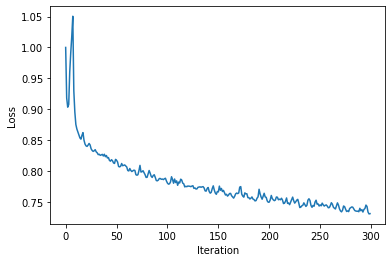

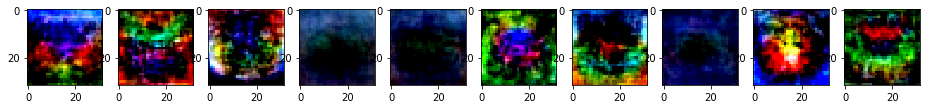

In [5]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)

#Matrix w
for i in range(10):
    img = w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

In [7]:
#train accuracy,train loss
h = 1.0/(1.0+np.exp(-(x_train.dot(w1)+b1)))
y_pred = h.dot(w2)+b2
train_acc = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
#train_acc = 1/Ntr*(np.sum(np.argmax(y_pred,axis=1)==np.argmax(y_train,axis=1)))
train_loss = 1./batch_size*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))

#test accuracy, test loss
h = 1.0/(1.0+np.exp(-(x_test.dot(w1)+b1)))
y_pred = h.dot(w2)+b2
test_acc = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
#test_acc = 1/Nte*(np.sum(np.argmax(y_pred,axis=1)==np.argmax(y_test,axis=1)))
test_loss = 1./batch_size*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))

print("train_acc = ", train_acc)
print("train_loss = ", train_loss)
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)


train_acc =  0.7782222222222223
train_loss =  0.7356828673866057
test_acc =  0.7644444444444445
test_loss =  0.15161845899604695
